# Chi Squared Distribution

Dustin D. Gerrard
<br>
September 2018

This notebook describes the Chi Squared distribution.
<br>
<br>
https://en.wikipedia.org/wiki/Chi-squared_distribution
<br>
<br>
Examples:
* Used in analysis of variance problems with F-distribution.


<h2><center><u> Chi Squared p.d.f.</u></center></h2>

\begin{equation*}
\Large
f(x; k) = \frac{1}{2^{(k/2)}\Gamma(k/2)}x^{k/2-1}e^{-x/2}
\end{equation*}

<h2><center><u>Gamma Function </u></center></h2>

\begin{equation*}
\Large
\Gamma(x) = (x-1)!
\end{equation*}

\begin{equation*}
\Large
\Gamma(x) = \int_{0}^{\infty}x^{z-1}e^{-x}dx
\end{equation*}

In [1]:
from IPython.core.display import Image
# from PIL import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/3/35/Chi-square_pdf.svg', width=560, height=560) 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.special import erf, erfinv, gamma, gammainc

# Chi Squared Distribution using scipy

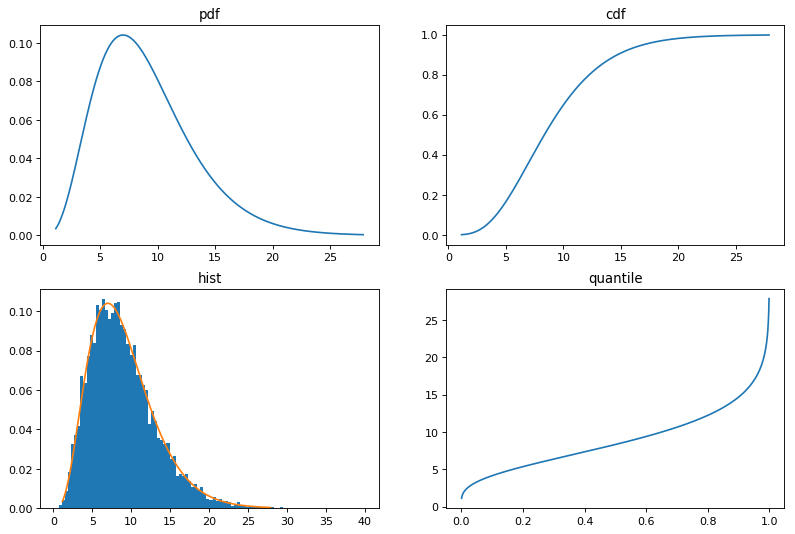

In [8]:
# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2.html
k = 9
x = np.linspace(chi2.ppf(0.001, k), chi2.ppf(0.999, k), 1000) # ppf = percent point function
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(x, chi2.pdf(x,k)) # pdf = probability distribution function
plt.title('pdf')
plt.subplot(222)
plt.plot(x, chi2.cdf(x,k)) # cdf = cumumlative distribution function
plt.title('cdf')
plt.subplot(223)
r = chi2.rvs(k, size=10000) # rvs = random variates
plt.hist(r, 100, density=True)
plt.plot(x, chi2.pdf(x,k))
plt.title('hist')
r = chi2.rvs(k, size=100000)
plt.subplot(224)
q = np.linspace(0.001, 0.999, 1000)
plt.plot(q, chi2.ppf(q,k))
plt.title('quantile')
plt.show()

In [9]:
mean, var, skew, kurt = chi2.stats(k, moments='mvsk')
median = chi2.median(k,loc=0, scale=1)

# Chi Squared Distribution explicitly in Python

In [30]:
def chi2Dist(k):
    Xs = np.linspace(0, 10+k/10, 101)
    Ys = 1/(pow(2,k/2)*gamma(k/2))*pow(Xs,k/2-1)*np.exp(-Xs/2)
    CDFs = gammainc(k/2, Xs/2) # /gamma(k/2)
    return Xs, Ys, CDFs

### pdf - probability distribution function

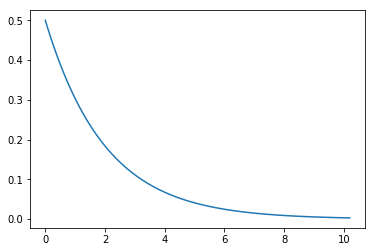

In [15]:
k = 2 # mean and standard deviation
Xs, Ys, CDFs = chi2Dist(k)
plt.plot(Xs,Ys)
plt.show()

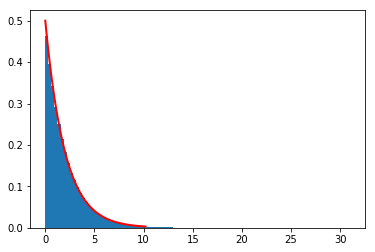

In [17]:
k = 2
A = np.random.chisquare(k, 1000000)
Xs, Ys, CDFs = chi2Dist(k)
fig, ax1 = plt.subplots()
plt.hist(A, 100, density=True)
plt.plot(Xs, Ys, linewidth=2, color='r')
plt.show()

### cdf - cumulative distribution function

C:\Users\dgerrard\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


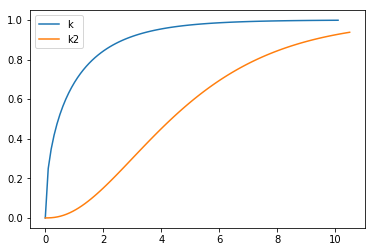

In [32]:
k = 1 # mean and standard deviation
Xs, Ys, CDFs = chi2Dist(k)
k2 = 5
Xs2, Ys2, CDFs2 = chi2Dist(k2)
plt.plot(Xs,CDFs)
plt.plot(Xs2,CDFs2)
plt.legend(['k','k2'])
plt.show()

### Quantile

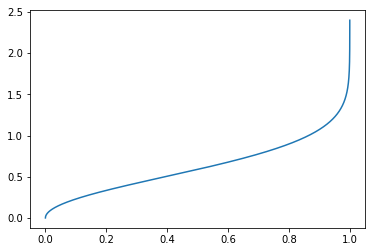

In [9]:
lambda0 = 2
Fs = np.linspace(0,1,100001)
Qs = sigma*np.sqrt(-2*np.log(1-Fs))
plt.plot(Fs,Qs)
plt.show()